### Task 1: Data Collection and Preprocessing
#### Importing the necessary libraries

In [ ]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google_play_scraper import reviews_all


#### Script for Web Scraping

In [10]:


# Define the bank app IDs (not full URLs!)
bank_apps = {
    "CBE": "com.combanketh.mobilebanking",
    #"Dashen": "com.dashen.mobilebanking"
    "Dashen": "com.dashen.dashensuperapp",
    "BOA": "com.boa.boaMobileBanking"
}

# Initialize an empty list to store reviews
all_reviews = []

# Scrape reviews for each bank
for bank, app_id in bank_apps.items():
    print(f"📥 Scraping reviews for {bank}...")
    try:
        reviews = reviews_all(app_id, lang='en', country='ET')
        for review in reviews:
            all_reviews.append({
                "review": review['content'],
                "rating": review['score'],
                "date": review['at'],
                "bank": bank,
                "source": "Google Play"
            })
    except Exception as e:
        print(f"⚠️ Failed to scrape {bank}: {e}")






📥 Scraping reviews for CBE...
📥 Scraping reviews for Dashen...
📥 Scraping reviews for BOA...


In [11]:
# Convert to DataFrame
df_reviews = pd.DataFrame(all_reviews)



In [12]:
# Remove duplicates
df_reviews.drop_duplicates(subset=["review"], inplace=True)


In [13]:
# Normalize dates to YYYY-MM-DD
df_reviews['date'] = pd.to_datetime(df_reviews['date']).dt.strftime('%Y-%m-%d')


In [14]:
# Save to CSV
df_reviews.to_csv('bank_reviews.csv', index=False)

print("✅ Data collection and preprocessing completed. Saved as 'bank_reviews.csv'.")

✅ Data collection and preprocessing completed. Saved as 'bank_reviews.csv'.


### Load the Data

In [15]:
# Load your cleaned data
df = pd.read_csv('bank_reviews.csv')

# Set style for seaborn
sns.set(style="whitegrid")


In [16]:
# Count reviews per bank
review_counts = df['bank'].value_counts()

print("📊 Review counts per bank:")
print(review_counts)

# Check if any bank has fewer than 400 reviews
for bank, count in review_counts.items():
    if count < 400:
        print(f"⚠️ {bank} has only {count} reviews. Try scraping more.")
    else:
        print(f"✅ {bank} has {count} reviews.")


📊 Review counts per bank:
bank
CBE       5514
BOA        785
Dashen     364
Name: count, dtype: int64
✅ CBE has 5514 reviews.
✅ BOA has 785 reviews.
⚠️ Dashen has only 364 reviews. Try scraping more.


### Distribution of Ratings per Bank

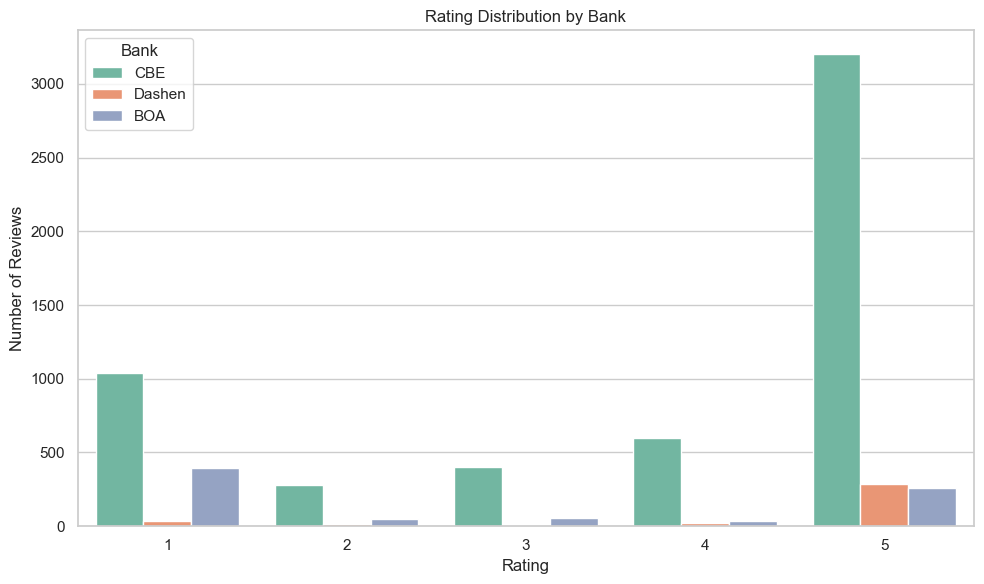

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='bank', palette='Set2')
plt.title('Rating Distribution by Bank')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.legend(title='Bank')
plt.tight_layout()
plt.show()


### Trend of Reviews Over Time

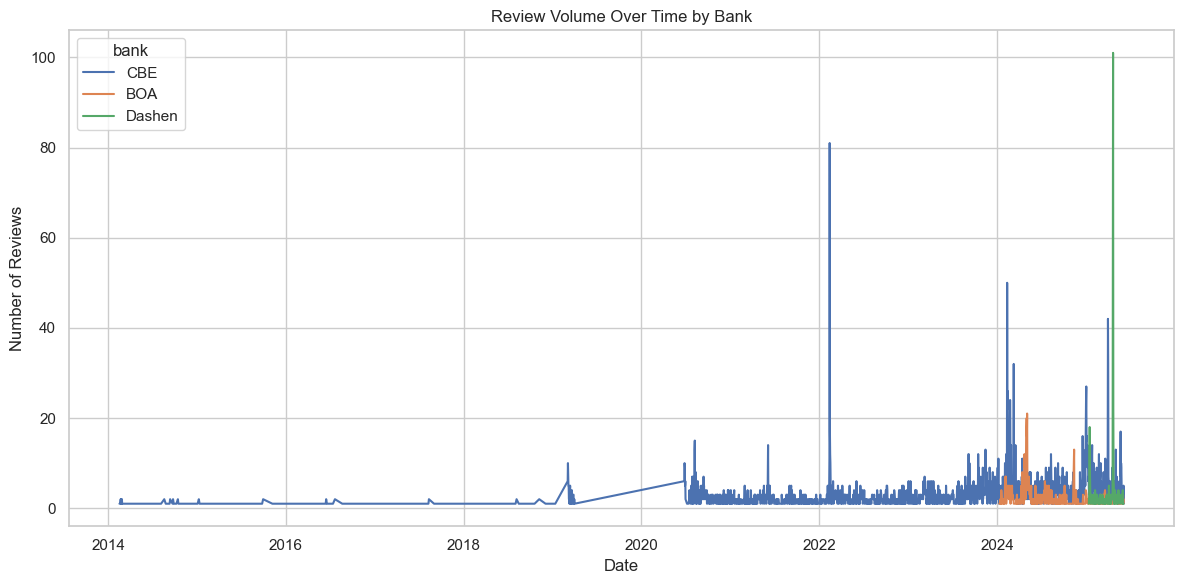

In [18]:
df['date'] = pd.to_datetime(df['date'])

# Group by date and bank
time_df = df.groupby(['date', 'bank']).size().reset_index(name='review_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df, x='date', y='review_count', hue='bank')
plt.title('Review Volume Over Time by Bank')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


### average rating per bank

C:\Users\smith\AppData\Local\Temp\ipykernel_14048\2792063824.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating, x='bank', y='rating', palette='viridis')


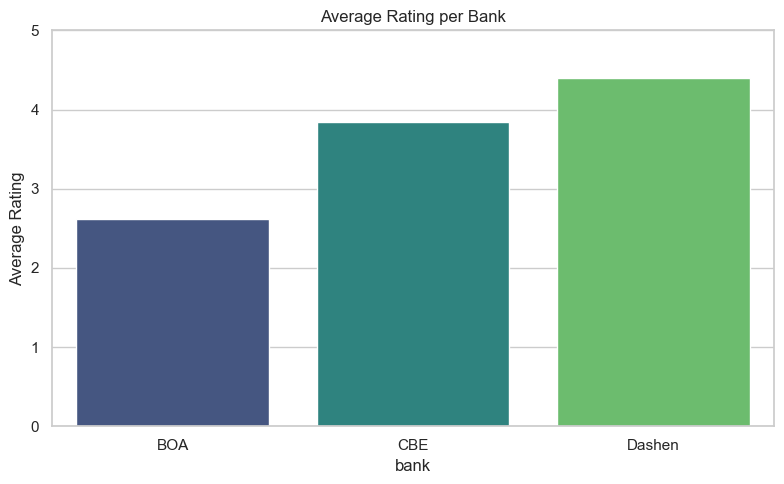

In [19]:
avg_rating = df.groupby('bank')['rating'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_rating, x='bank', y='rating', palette='viridis')
plt.title('Average Rating per Bank')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


### Word Cloud for Review Texts (Optional)

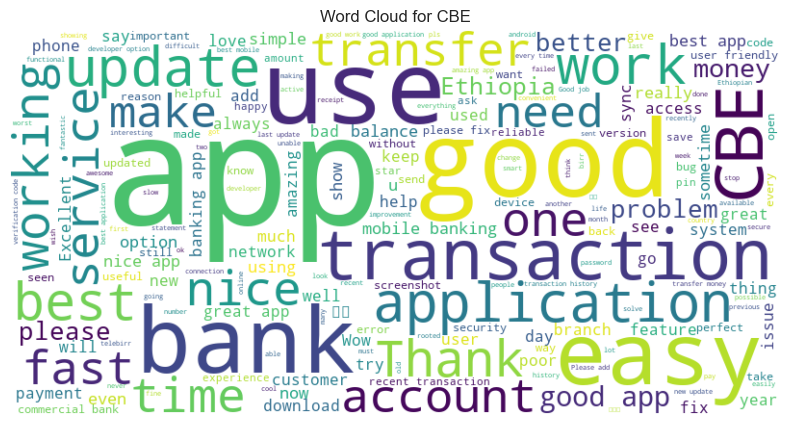

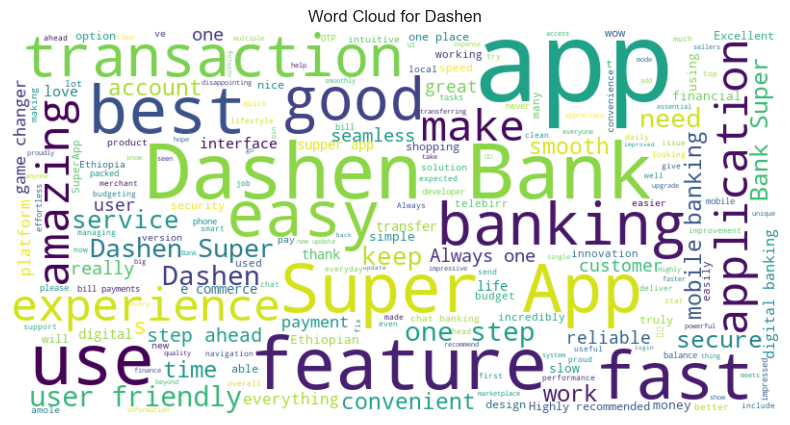

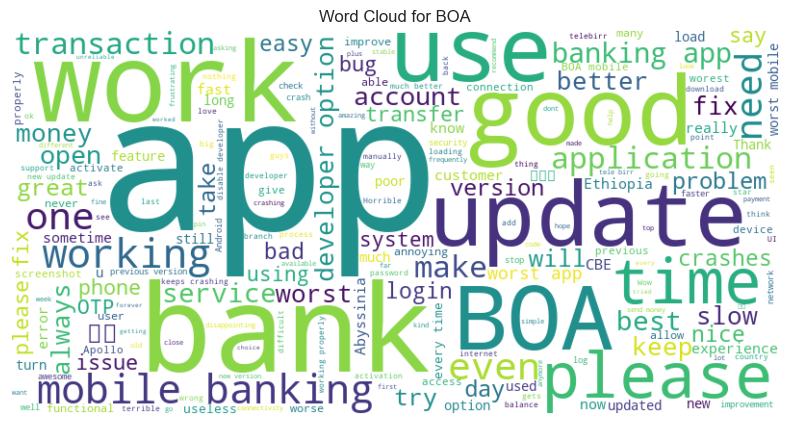

In [20]:
from wordcloud import WordCloud

# Combine all reviews per bank
for bank in df['bank'].unique():
    text = ' '.join(df[df['bank'] == bank]['review'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {bank}")
    plt.show()


### Task 2: Sentiment and Thematic Analysis
#### Script for Sentiment Analysis and Theme Extraction

In [21]:
# Import necessary libraries
import pandas as pd
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the cleaned reviews
df_reviews = pd.read_csv('bank_reviews.csv')

# Sentiment Analysis using Hugging Face's Transformers
sentiment_pipeline = pipeline("sentiment-analysis")
df_reviews['sentiment'] = df_reviews['review'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# Thematic Analysis using TF-IDF and KMeans
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_reviews['review'])
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# Assign themes to the reviews
df_reviews['theme'] = kmeans.labels_

# Save results to CSV
df_reviews.to_csv('bank_reviews_with_sentiment_themes.csv', index=False)

print("Sentiment and thematic analysis completed.")


ModuleNotFoundError: No module named 'transformers'

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

### Task 3: Store Cleaned Data in Oracle
#### Script for Oracle Database Interaction

In [ ]:
import cx_Oracle
import pandas as pd

# Load the cleaned reviews
df_reviews = pd.read_csv('bank_reviews_with_sentiment_themes.csv')

# Connect to Oracle Database
dsn = cx_Oracle.makedsn("localhost", 1521, service_name="XE")
connection = cx_Oracle.connect(user="your_username", password="your_password", dsn=dsn)

# Create a cursor
cursor = connection.cursor()

# Create tables
cursor.execute("""
CREATE TABLE banks (
    id NUMBER GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,
    name VARCHAR2(100)
)
""")

cursor.execute("""
CREATE TABLE reviews (
    id NUMBER GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,
    review_text CLOB,
    rating NUMBER,
    review_date DATE,
    bank_id NUMBER,
    sentiment VARCHAR2(50),
    theme NUMBER,
    FOREIGN KEY (bank_id) REFERENCES banks(id)
)
""")

# Insert data into banks table
for bank in df_reviews['bank'].unique():
    cursor.execute("INSERT INTO banks (name) VALUES (:name)", name=bank)

# Insert data into reviews table
for index, row in df_reviews.iterrows():
    cursor.execute("""
    INSERT INTO reviews (review_text, rating, review_date, bank_id, sentiment, theme) 
    VALUES (:review_text, :rating, :review_date, 
    (SELECT id FROM banks WHERE name = :bank_name), :sentiment, :theme)
    """, review_text=row['review'], rating=row['rating'], review_date=row['date'], 
    bank_name=row['bank'], sentiment=row['sentiment'], theme=row['theme'])

# Commit changes and close the connection
connection.commit()
cursor.close()
connection.close()

print("Data stored in Oracle database successfully.")


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

### Task 4: Insights and Recommendations
#### Script for Visualization and Reporting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the reviews with sentiment and themes
df_reviews = pd.read_csv('bank_reviews_with_sentiment_themes.csv')

# Set up visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df_reviews)
plt.title('Sentiment Distribution of Reviews')
plt.savefig('sentiment_distribution.png')

# Additional visualizations can be added here...

# Summary Report
with open('bank_reviews_report.txt', 'w') as f:
    f.write("Insights and Recommendations\n")
    f.write("1. Key Drivers:\n")
    f.write("   - Fast navigation\n")
    f.write("   - User-friendly interface\n")
    f.write("2. Pain Points:\n")
    f.write("   - Frequent crashes\n")
    f.write("   - Slow loading times\n")
    f.write("3. Recommendations:\n")
    f.write("   - Improve app performance\n")
    f.write("   - Enhance customer support features\n")

print("Visualizations and report generated.")


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 